# **Avaliação - Redes Neurais**


---
Fit - Instituto de Técnologia 

Prof. Adson Nogueira Alves


In [ ]:
# TODO: Coloque seu nome e e-mail 
print(f'Nome: {"..Lilian Kalinka.."}')
print(f'E-mail: {"..liliankalinkabel@gmail.com.."}')

Nome: ..Lilian Kalinka..
E-mail: ..liliankalinkabel@gmail.com..


**Objetivo**

Explorar técnicas de classificação, com intuito de atingir o melhor modelo possivel para o 

problema, evitando overfitting. De forma particular construir um sistema de reconhecimento

 e classificação de imagens usando o  [PathMNIST dataset](https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.1002730).


---



# **Dataset**

**PathMNIST** é um conjunto de dados de imagens de artigos do MedMNIST, consistindo 

em um conjunto de treinamento de 89.996 exemplos, um conjunto de validação de 10.004 

exemplos e um conjunto de teste de 7.180 exemplos.

Cada exemplo de patologia do cólon é uma imagem RGB 28x28, associada a um rótulo de 9 

classes.

Cada exemplo é atribuído a um dos seguintes rótulos:

**Descrição da etiqueta**

* ADI adipose tissue
* BACK background
* DEB debris
* LYM lymphocytes
* MUC mucus
* MUS smooth muscle
* NORM normal colon mucosa
* STR cancer-associated stroma
* TUM colorectal adenocarcinoma epithelium.

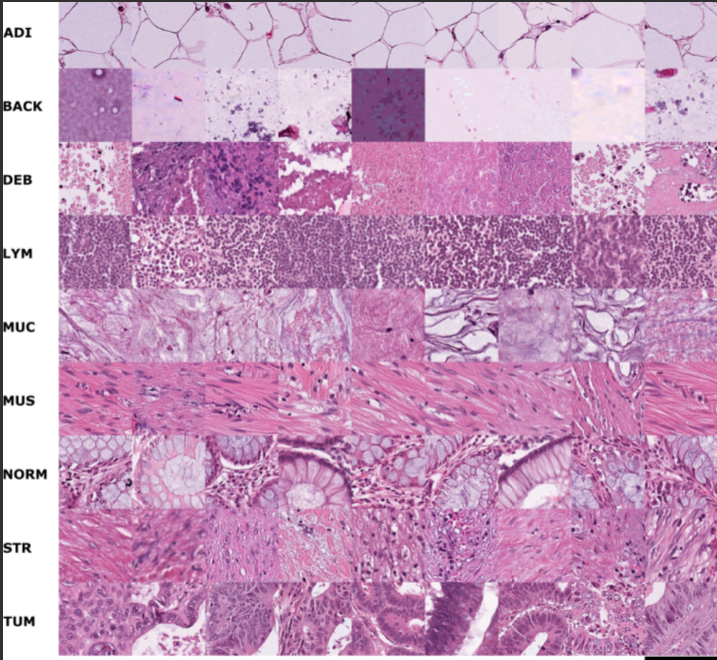



---



# **Entenda o codigo e execute** 

In [ ]:
# Download dataset
! wget https://zenodo.org/record/5208230/files/pathmnist.npz

--2022-01-21 12:50:36--  https://zenodo.org/record/5208230/files/pathmnist.npz
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205615438 (196M) [application/octet-stream]
Saving to: ‘pathmnist.npz’

pathmnist.npz       100%[===================>] 196.09M  7.94MB/s    in 16s     

2022-01-21 12:50:54 (11.9 MB/s) - ‘pathmnist.npz’ saved [205615438/205615438]



In [ ]:
import numpy as np

In [ ]:
# preparing data to use with sklearn
pathmnist = np.load('pathmnist.npz',)

x_train, y_train = pathmnist['train_images'], pathmnist['train_labels']
x_val, y_val = pathmnist['val_images'], pathmnist['val_labels']
x_test, y_test = pathmnist['test_images'], pathmnist['test_labels']

x_train = x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

y_train = y_train.squeeze()
y_val = y_val.squeeze()
y_test = y_test.squeeze()



---



# **Questões**

**1. (2 pontos)** Execute um modelo de classificação (Regressão logistica) usando Scikit-Learn. 

Use Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept = True,
                         multi_class = 'auto',
                         penalty = 'l2',
                         solver = 'saga',
                         max_iter = 10000,
                         C = 50)

    


**2. (1 ponto)** Faço o treinamento do modelo utilizando apenas 1000 imagens

In [ ]:
clf.fit(x_train[0:1000],y_train[0:1000])

LogisticRegression(C=50, max_iter=10000, solver='saga')

**3. (1 pontos)** Mostre as:
* Classes de saida da rede. (Utilize os atributos da função)
* Numero de iterações antes da tolerancia ser atingida 
* Pesos da imagem na classe [3]
* O bias para as 9 classes
* A penalty de regularização para evitar o overfitting 

In [ ]:
print(clf.classes_)
print(clf.n_iter_)
print(clf.coef_[3])
print(clf.intercept_)
print(clf.penalty)


[0 1 2 3 4 5 6 7 8]
[3229]
[-0.00070794  0.00033718  0.00013237 ... -0.00064692 -0.00176029
 -0.00085044]
[ 2.60838838e-05  2.33379971e-04 -8.91179438e-05  4.71075042e-05
 -1.67832093e-05 -1.81988659e-04  1.05113536e-05 -5.03926105e-05
  2.11997097e-05]
l2


**4. (1 ponto)** Mostre o vetor de predição para os valores de *x_val*, *score* de treinamento e o *score*

 de validação

In [ ]:
print(clf.predict(x_val))
print(clf.score(x_val,y_val))
print(clf.score(x_train,y_train))

[1 1 0 ... 3 4 0]
0.2543982407037185
0.26024489977332327


**5. (1 pontos)** Gere a matriz de confusão, dos dados de validação 

Text(0.5, 1.0, 'Accuracy Score: 0.3753498600559776')

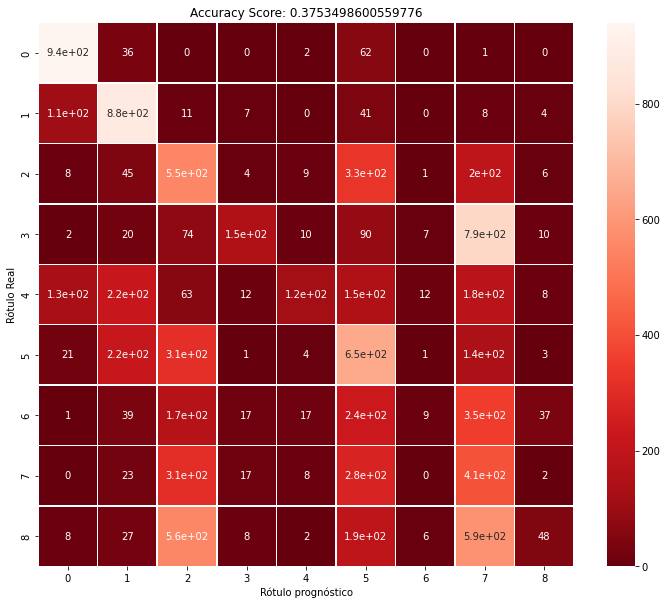

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val,clf.predict(x_val), labels = clf.classes_)
plt.figure(figsize = (12,10))
sns.heatmap(cm, annot=True, cmap = 'Reds_r',linewidths=.5)
plt.ylabel('Rótulo Real')
plt.xlabel('Rótulo prognóstico')
plt.title(f'Accuracy Score: {clf.score(x_val,y_val)}')


**6. (1 ponto)** Execute uma rede neural, usando uma ou duas camadas ocultas. Você deve conseguir 

escolher peso e bias de inicialização, função de ativação, número de neurônios ocultos, função de perda .... 

mantenha simples. (More o score de treinamento e validação)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=None,
                    activation = 'relu',
                    solver = 'adam',
                    max_iter = 1000,
                    alpha=0,
                    learning_rate='constant',
                    learning_rate_init=0.0001,
                    hidden_layer_sizes =(100))
clf.fit(x_train[0:100],y_train[0:100])

MLPClassifier(alpha=0, hidden_layer_sizes=100, learning_rate_init=0.0001,
              max_iter=1000)

In [ ]:
clf.score(x_train,y_train)

0.1844970887595004

**7. (3 pontos)** Aplique técnicas de preprocessamento de imagem para melhorar o desempenho da 

rede neural (RGB para Escala Cinza, Padronização e Normalização) - Use MLPClassifier

**Escala cinza**

89996
(89996, 28, 28)


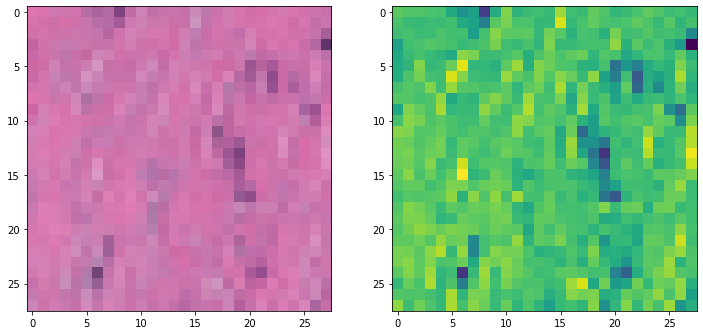

In [ ]:
from skimage.color import rgb2gray
frame = np.array([rgb2gray(np.uint8((x_train[i].reshape(28,28,3))*1))for i in range(len(x_train))])
fig, axes = plt.subplots(1,2, figsize=(12,10))
axes[0].imshow(x_train[32].reshape(28,28,3))
axes[1].imshow(frame[32])
print(len(frame))
print(frame.shape)

In [ ]:
from sklearn.neural_network import MLPClassifier
frame = frame.reshape(frame.shape[0], -1)
clf = MLPClassifier(random_state=None,
                    activation = 'relu',
                    solver = 'adam',
                    max_iter = 1000,
                    alpha=1e-4,
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    hidden_layer_sizes =(100))
clf.fit(frame[:100],y_train[:100])
frame_val =  np.array([rgb2gray(np.uint8((x_val[i].reshape(28,28,3))*1))for i in range(len(x_val))])
frame_val = frame_val.reshape(frame_val.shape[0], -1)
clf.predict(frame_val[0:100])


array([4, 0, 1, 1, 1, 1, 1, 2, 1, 5, 1, 1, 2, 1, 1, 2, 1, 1, 5, 2, 5, 0,
       1, 1, 2, 1, 0, 8, 0, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1,
       5, 1, 2, 1, 1, 1, 1, 2, 1, 1, 5, 5, 1, 4, 1, 1, 1, 1, 1, 2, 2, 5,
       1, 0, 1, 1, 1, 2, 1, 1, 1, 4, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       1, 1, 0, 6, 2, 5, 1, 1, 1, 1, 8, 8], dtype=uint8)

In [ ]:
frame_val =  np.array([rgb2gray(np.uint8((x_val[i].reshape(28,28,3))*1))for i in range(len(x_val))])
frame_val = frame_val.reshape(frame_val.shape[0], -1)
clf.score(frame[0:100],y_train[0:100])

1.0

In [ ]:
clf.score(frame_val, y_val)

0.1571371451419432

**Normalização** 

In [ ]:
from sklearn import preprocessing
X_normalized = preprocessing.normalize(x_train, norm ='l2')
clf = MLPClassifier(random_state=None,
                    activation = 'relu',
                    solver = 'adam',
                    max_iter = 1000,
                    alpha=0,
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    hidden_layer_sizes =(100))   
clf.fit(X_normalized,y_train)  
X_normalized_val = preprocessing.normalize(x_val, norm ='l2')  
clf.predict(X_normalized_val)             



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


array([1, 0, 0, ..., 3, 0, 0], dtype=uint8)

In [ ]:
clf.score(X_normalized,y_train)

0.48779945775367795

In [ ]:
clf.score(X_normalized_val,y_val)

0.47720911635345864

**Padronização**

In [ ]:
from sklearn import preprocessing
x_train_scaler = preprocessing.StandardScaler().fit(x_train)
x_stand = x_train_scaler.transform(x_train)
clf = MLPClassifier(random_state=None,
                    activation = 'relu',
                    solver = 'adam',
                    max_iter = 1000,
                    alpha=0,
                    learning_rate='constant',
                    learning_rate_init=0.0001,
                    hidden_layer_sizes =(100)) 

clf.fit(x_stand,y_train)
x_stand_val = x_train_scaler.transform(x_val)
clf.predict(x_stand_val)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


array([5, 0, 1, ..., 3, 0, 0], dtype=uint8)

In [ ]:
clf.score(x_stand,y_train)

0.9162962798346593

In [ ]:
clf.score(x_stand_val,y_val)

0.6424430227908836

**8. (1 ponto)** Utilize uma nova arquitetura para a rede (taxa de aprendizado constante, valor da taxa de 

aprendizado = 1e^-4, maximo de iterações = 1000, otimizador = adam, função de ativação = 'relu', camada 

oculta unica com 150 neurônios

In [ ]:
from sklearn.neural_network import MLPClassifier
na_1l= MLPClassifier(random_state=42,
                    activation = 'relu',
                    solver = 'adam',
                    max_iter = 1000,
                    alpha=1e-4,
                    learning_rate='constant',
                    learning_rate_init=0.0001,
                    hidden_layer_sizes =(150))
na_1l.fit(x_train,y_train)
na_1l.predict(x_val)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


array([2, 0, 0, ..., 6, 0, 0], dtype=uint8)

In [ ]:
na_1l.score(x_train,y_train)

0.28745722032090315

In [ ]:
na_1l.score(x_val,y_val)

0.27938824470211915

**9.(1 point)** Aplique um peso de regularização para evitar o overfitting (alpha) e melhorar o desempenho da

rede neural. Utilize o seu melhor resultado de preprocessamento.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
a = 89995
x_train_scaler = preprocessing.StandardScaler().fit(x_train[0:a])
x_stand = x_train_scaler.transform(x_train[0:a])
clf = MLPClassifier(random_state=None,
                    activation = 'relu',
                    solver = 'adam',
                    max_iter = 1000,
                    alpha=0,
                    learning_rate='constant',
                    learning_rate_init=0.0001,
                    hidden_layer_sizes =(100)) 

clf.fit(x_stand,y_train[0:a])
x_stand_val = x_train_scaler.transform(x_val[0:a])
clf.predict(x_stand_val)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


array([5, 0, 1, ..., 3, 0, 0], dtype=uint8)

In [ ]:
clf.score(x_stand[0:89995],y_train[0:89995])

0.6254236346463693

In [ ]:
clf.score(x_stand_val[0:89996],y_val[0:89996])

0.5928628548580568

**10. (3 pontos)** Quais suas conclusões ? Fale sobre as arquiteturas, preprocessamento ... (Campo livre)

As Redes Neurais são modelos computacional matemático parecido com o sistema nervoso dos seres humanos. É formada basicamente por um conjunto de unidades de processamentos que são interligadas por sinapse artificias.
A arquitetura de uma rede neural se refere a disposição dos neurônios, um em relação ao outro seguindo as suas conexões sinapsas. Em uma arquitetura de  feedforward simples uma camada de entrada é diretamente associada a um ou mais neurônios que geram as resposta de saídas.São empregadas em problemas de classificação de padrões e filtragem.
feedforward de camadas múltiplas são constituída por uma ou mais camadas escondidas de neurônios. São empregadas em problemas de aproximação de funções, classificação de padrões, identificação de sistemas, otimização, robótica e controle de processos.
Com realimentação ou recorrentes a saída de alguns neurônios alimentam neurônios da mesma camada ou de camadas anteriores sendo assim empregadas para o processamento de sistemas variantes no tempo.São empregadas em previsões de séries temporais, otimização, identificação de sistemas e controle de processos.

O pré processamento de uma uma rede neural é um pouco complexo, pois os atributos numéricos devem ser normalizados dentro de uma escala de valores.E os conjuntos de dados devidamente processados deve ser divididos em subconjuntos distintos de treinamento, validação e testes.